In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregar e visualizar os dados

In [2]:
# Carregar os dados
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Visualizar Dataframe
df.head(5)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
# Ajustar DataFrame

df.drop('Id', axis=1, inplace=True)
df.dropna(inplace=True, axis=0)

# Aplicar OneHotEncoding nas variáveis categóricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [6]:
# DataFrame atualizado
df.head(5)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        981 non-null    float64
 1   Peso                         981 non-null    float64
 2   Altura                       981 non-null    float64
 3   Colesterol                   981 non-null    float64
 4   Grupo Sanguíneo_A            981 non-null    uint8  
 5   Grupo Sanguíneo_AB           981 non-null    uint8  
 6   Grupo Sanguíneo_B            981 non-null    uint8  
 7   Grupo Sanguíneo_O            981 non-null    uint8  
 8   Fumante_Não                  981 non-null    uint8  
 9   Fumante_Sim                  981 non-null    uint8  
 10  Nível de Atividade_Alto      981 non-null    uint8  
 11  Nível de Atividade_Baixo     981 non-null    uint8  
 12  Nível de Atividade_Moderado  981 non-null    uint8  
dtypes: float64(4), uint8

### Treinar Modelo de Regressão Linear

In [8]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y=df['Colesterol']

In [9]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [10]:
# Treinar modelo
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

### Apresentar Plots Shapley Values

In [11]:
# Rodar o explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [12]:
# Calcular Shapley Values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 296it [00:54,  4.76it/s]                         


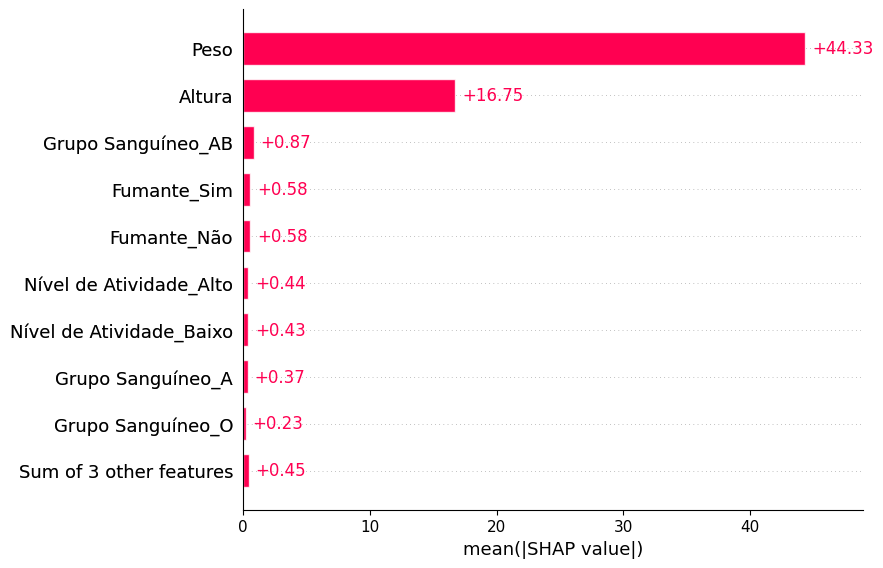

In [13]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_reg)

In [14]:
# Mostrar 1° instância do conjunto de testes
X_test.iloc[0, :]

Idade                           21.0
Peso                            53.4
Altura                         165.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 371, dtype: float64

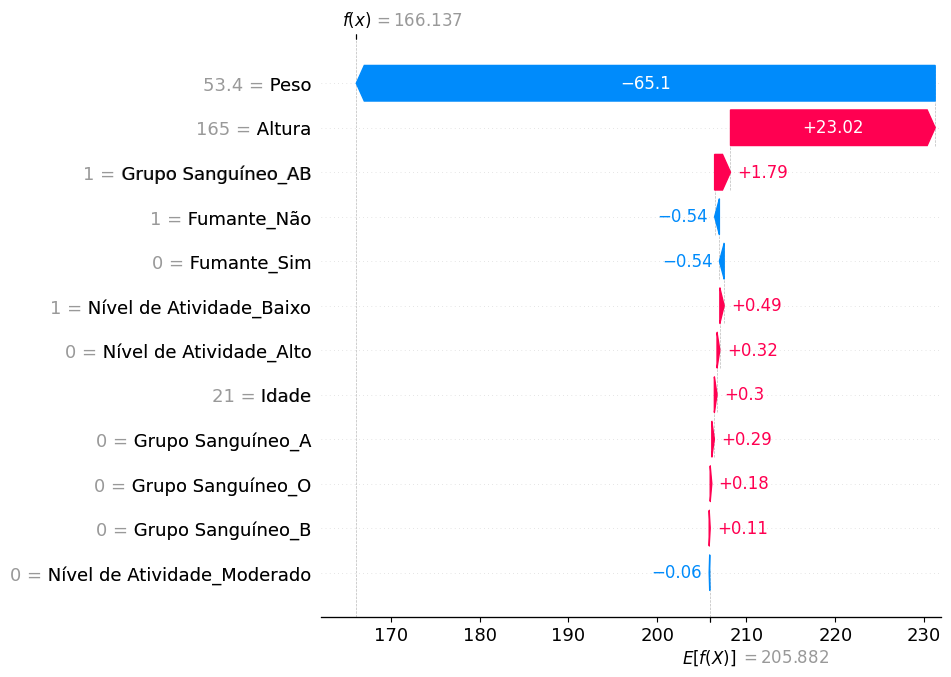

In [15]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

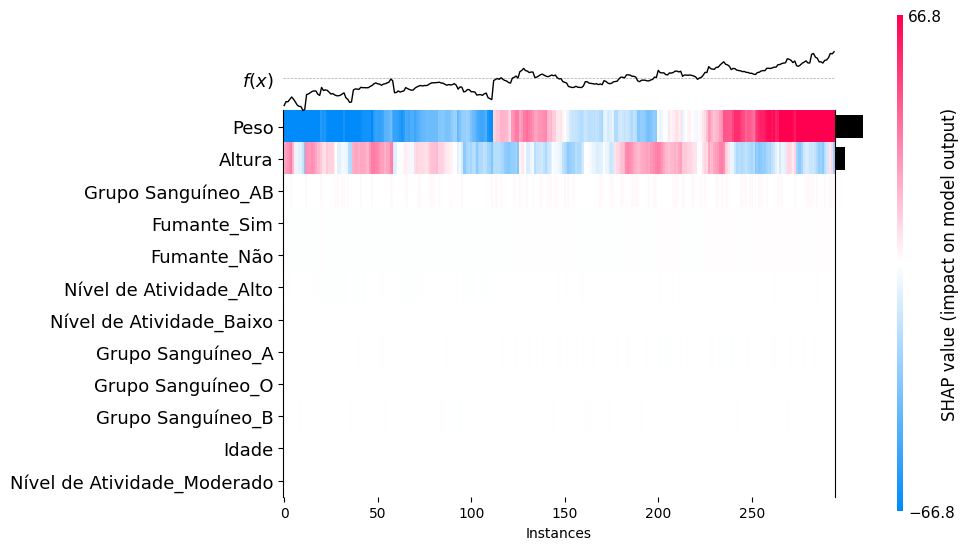

<Axes: xlabel='Instances'>

In [16]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_reg, max_display=13)

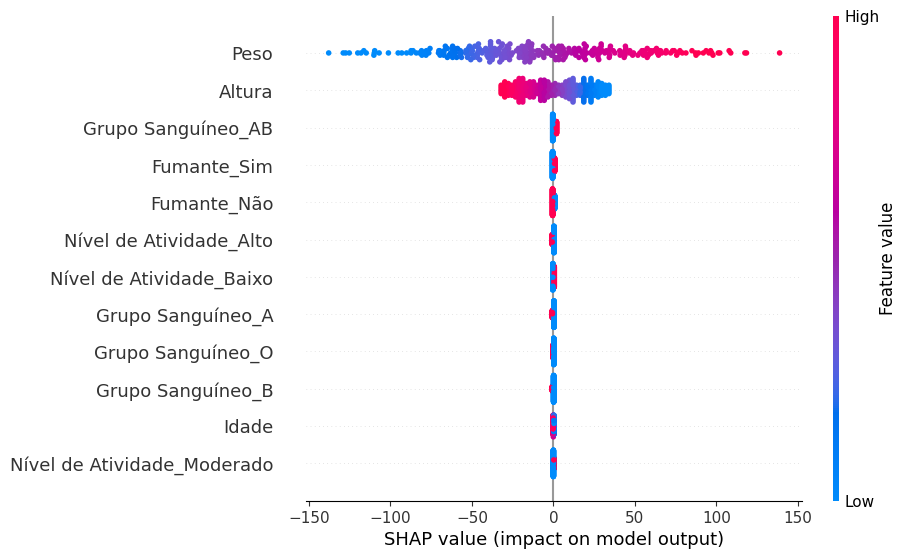

In [17]:
# Plot de Beeswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)